## Third Assignment
Lorenzo Domenichetti 2011653

due 02-05

In [1]:
library(tidyverse)
library(lubridate)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'gridExtra' was built under R version 4.0.5"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'lattice' was built under R version 4.0.5"


## Exercise 1
• The triangular distribution, in the interval (a, b), is given by the following:
\begin{equation}
f(x) = 
    \begin{cases}
     \frac{2(x − a)}{(b − a)(c − a)}   \,\,\,\,\,  a ≤ x < c  \\
     \frac{2(b − x)}{(b − a)(b − c)} \,\,\,\,\   c ≤ x ≤ b \\
      0 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, otherwise
    \end{cases}\,
\end{equation}
where c ∈ [a, b].

a) plot the function, given the interval (a, b)

b) and write an algorithm to generate random numbers from the triangular distribution

Warning message in plot.window(xlim, ylim, "", ...):
"parametro grafico "t" non valido"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"parametro grafico "t" non valido"


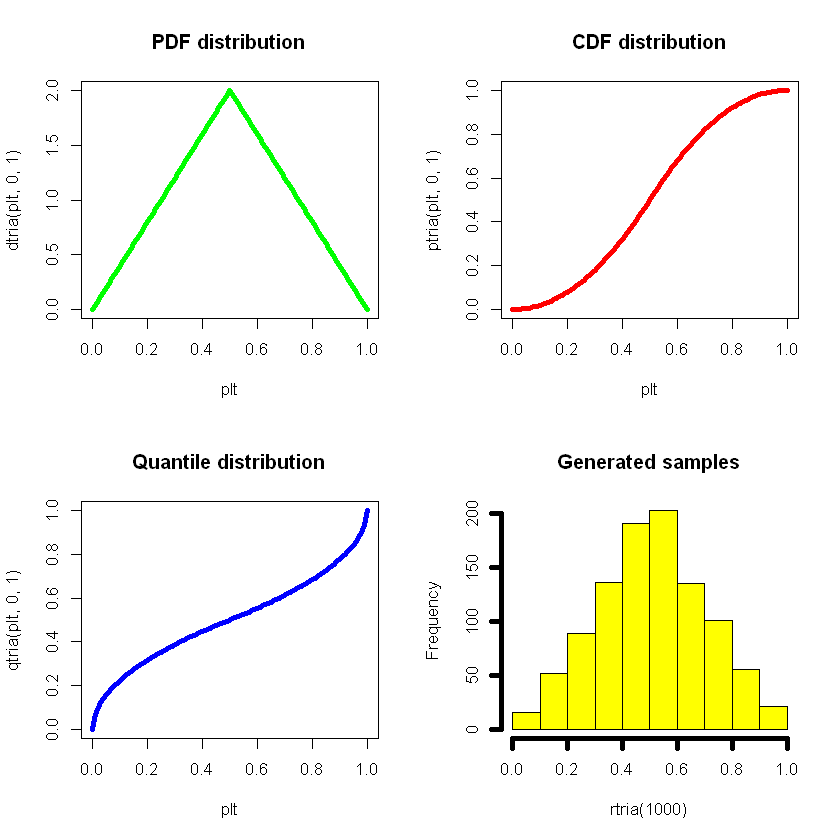

In [2]:
dtria = function(x, a= 0, b = 1, c=(a+b)/2) {
    ifelse((x <= c) & (x >= a), 2*(x-a)/((b-a)*(c-a)), 
    ifelse((x <= b) & (x >= c), 2*(b-x)/((b-a)*(b-c)),
            0))
}

ptria <- function(x, a = 0, b = 1, c=(a+b)/2){
    ifelse((x <= c) & (x >= a), (x-a)^2/((b-a)*(c-a)),
    ifelse((x <= b) & (x >= c), (2*b*x-x^2)/((b-a)*(b-c)) - (2*b*c-c^2)/((b-a)*(b-c)) + (c-a)/(b-a),                                  
    0))
}

qtria <- function (p, a = 0,b = 1, c=(a+b)/2) {
    k = (c-a)/(b-a)
    G = -(2*b*c -c^2)/((b-a)*(b-c)) + k
    return(ifelse(p < k , 
                  sqrt((b-a)*(c-a)*p)+a,
                  b-sqrt(b^2+(b-a)*(b-c)*(G-p))
                 )
          )
}

rtria <- function(n){
    qtria(runif(n))
}
                                                                                       
plt <- (0:100)/100


par(mfrow = c(2,2))

plot(plt, dtria(plt, 0, 1), lwd = 4, t = 'l', col = 'green', main = "PDF distribution")

plot(plt, ptria(plt, 0, 1), lwd = 4, t = 'l', col = 'red', main = "CDF distribution")

plot(plt,qtria(plt, 0, 1), lwd = 4, t = 'l', col = 'blue', main = "Quantile distribution")

hist(rtria(1000), lwd = 4, t = 'l', col ='yellow', main = 'Generated samples')

c) Generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



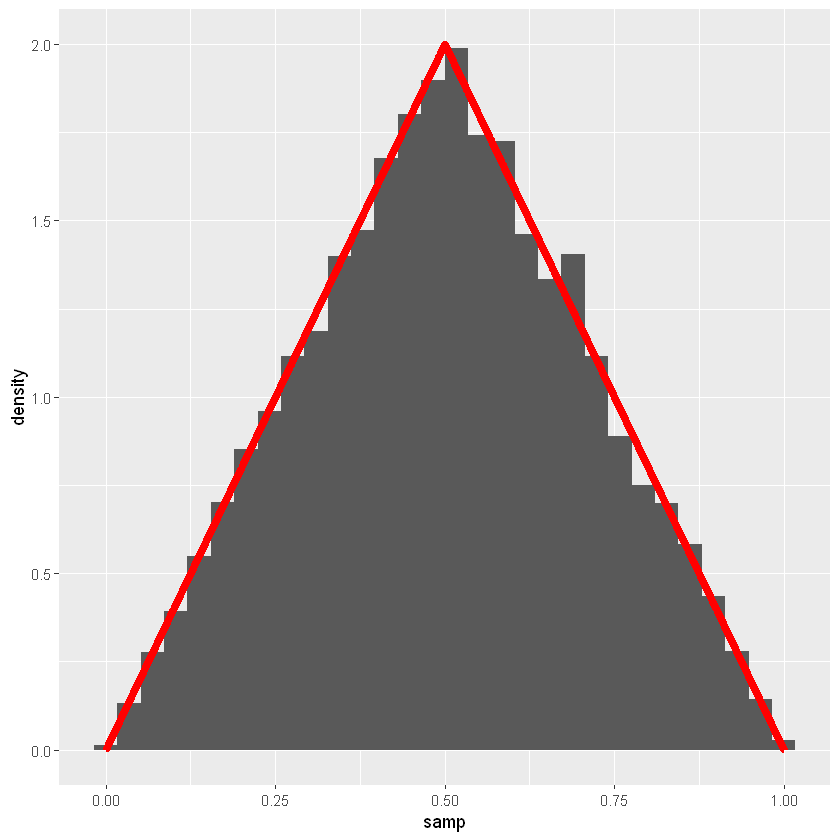

In [3]:
sample_10000 <- rtria(10000)

df = data.frame( dt = seq(0,1,l=10000), plot = dtria(seq(0,1,l=10000)), samp = sample_10000)
ggplot() + 
    geom_histogram(data = df, aes(x = samp, y = ..density..)) +
    geom_line(data = df, aes(x = dt, y = plot), color = "red", size = 2)

## Exercise 2 - Markov’s inequality

• Markov’s inequality represents an upper bound to probability distributions:
$$
P(X ≥ k) ≤ \frac{E[X]}{k}  \,\,\,\,\, for \,\,\, k > 0
$$
• having defined a function
$$
G(k) = 1 − F(k) ≡ P(X ≥ k)
$$

Plot G(k) and the Markov’s upper bound for

a) the exponential, Exp(λ = 1), distribution function

b) the uniform, U(3, 5), distribution function

c) the binomial, Bin(n = 1, p = 1/2), distribution function

d) a Poisson, Pois(λ = 1/2), distribution function


In [4]:
# exponential distribution
seq_exp = seq(0.01,10, l = 1000)
g_exp <- function (x) {
    double(1-pexp(x))
}

In [5]:
conv_fun <- function(x){
    return(1-x)
}

l_fun <- list(
    pexp, punif, pbinom, ppois)

args <- list(list(rate = 1), list(min = 3, max = 5), list(size = 1, prob=0.5), list(lambda = 0.5))
a <- map(invoke_map(l_fun, args, seq(0,10,l = 100)), conv_fun)
rip <- tibble( exp = a[[1]], unif = a[[2]], binom = a[[3]], pois = a[[4]],  ind = seq(0,10,l = 100))

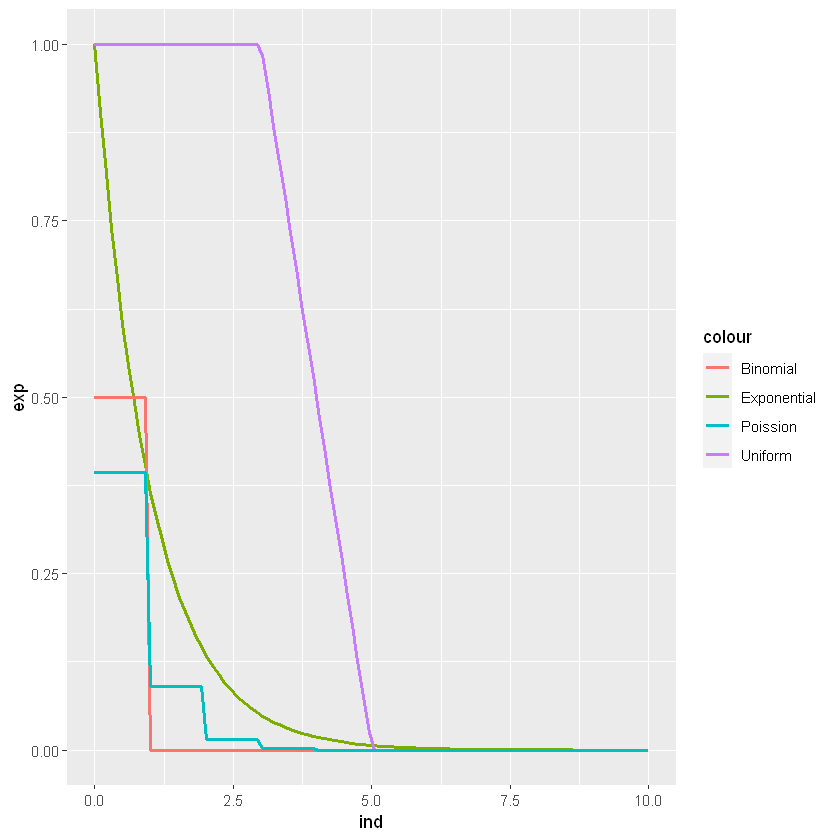

In [6]:
ggplot() + 
    geom_line(data = rip, aes(x = ind, y = exp,   color = "Exponential"), size = 1) + 
    geom_line(data = rip, aes(x = ind, y = unif,  color = "Uniform"),     size = 1) + 
    geom_line(data = rip, aes(x = ind, y = binom, color = "Binomial"),    size = 1) + 
    geom_line(data = rip, aes(x = ind, y = pois,  color = "Poission"),    size = 1) 

In [7]:
p1 <- ggplot() + 
    geom_line(data = rip, aes(x = ind, y = exp, color = "Exponential"), size = 1) + 
    geom_line(data = rip, aes(x = ind, y = 1/ind), color = "blue", linetype = "dashed")
p2 <- ggplot() + 
    geom_line(data = rip, aes(x = ind, y = pois, color = "Poisson"), size = 1) + 
    geom_line(data = rip, aes(x = ind, y = 2/ind), color = "blue", linetype = "dashed")
p3 <- ggplot() + 
    geom_line(data = rip, aes(x = ind, y = binom, color = "binomial"), size = 1) + 
    geom_line(data = rip, aes(x = ind, y = 0.5/ind), color = "blue", linetype = "dashed")
p4 <- ggplot() + 
    geom_line(data = rip, aes(x = ind, y = unif, color = "Uniform"), size = 1) + 
    geom_line(data = rip, aes(x = ind, y = 4/ind), color = "blue", linetype = "dashed") +
    xlim(0,7) + ylim (0,5)

Warning message:
"Removed 30 row(s) containing missing values (geom_path)."
Warning message:
"Removed 30 row(s) containing missing values (geom_path)."


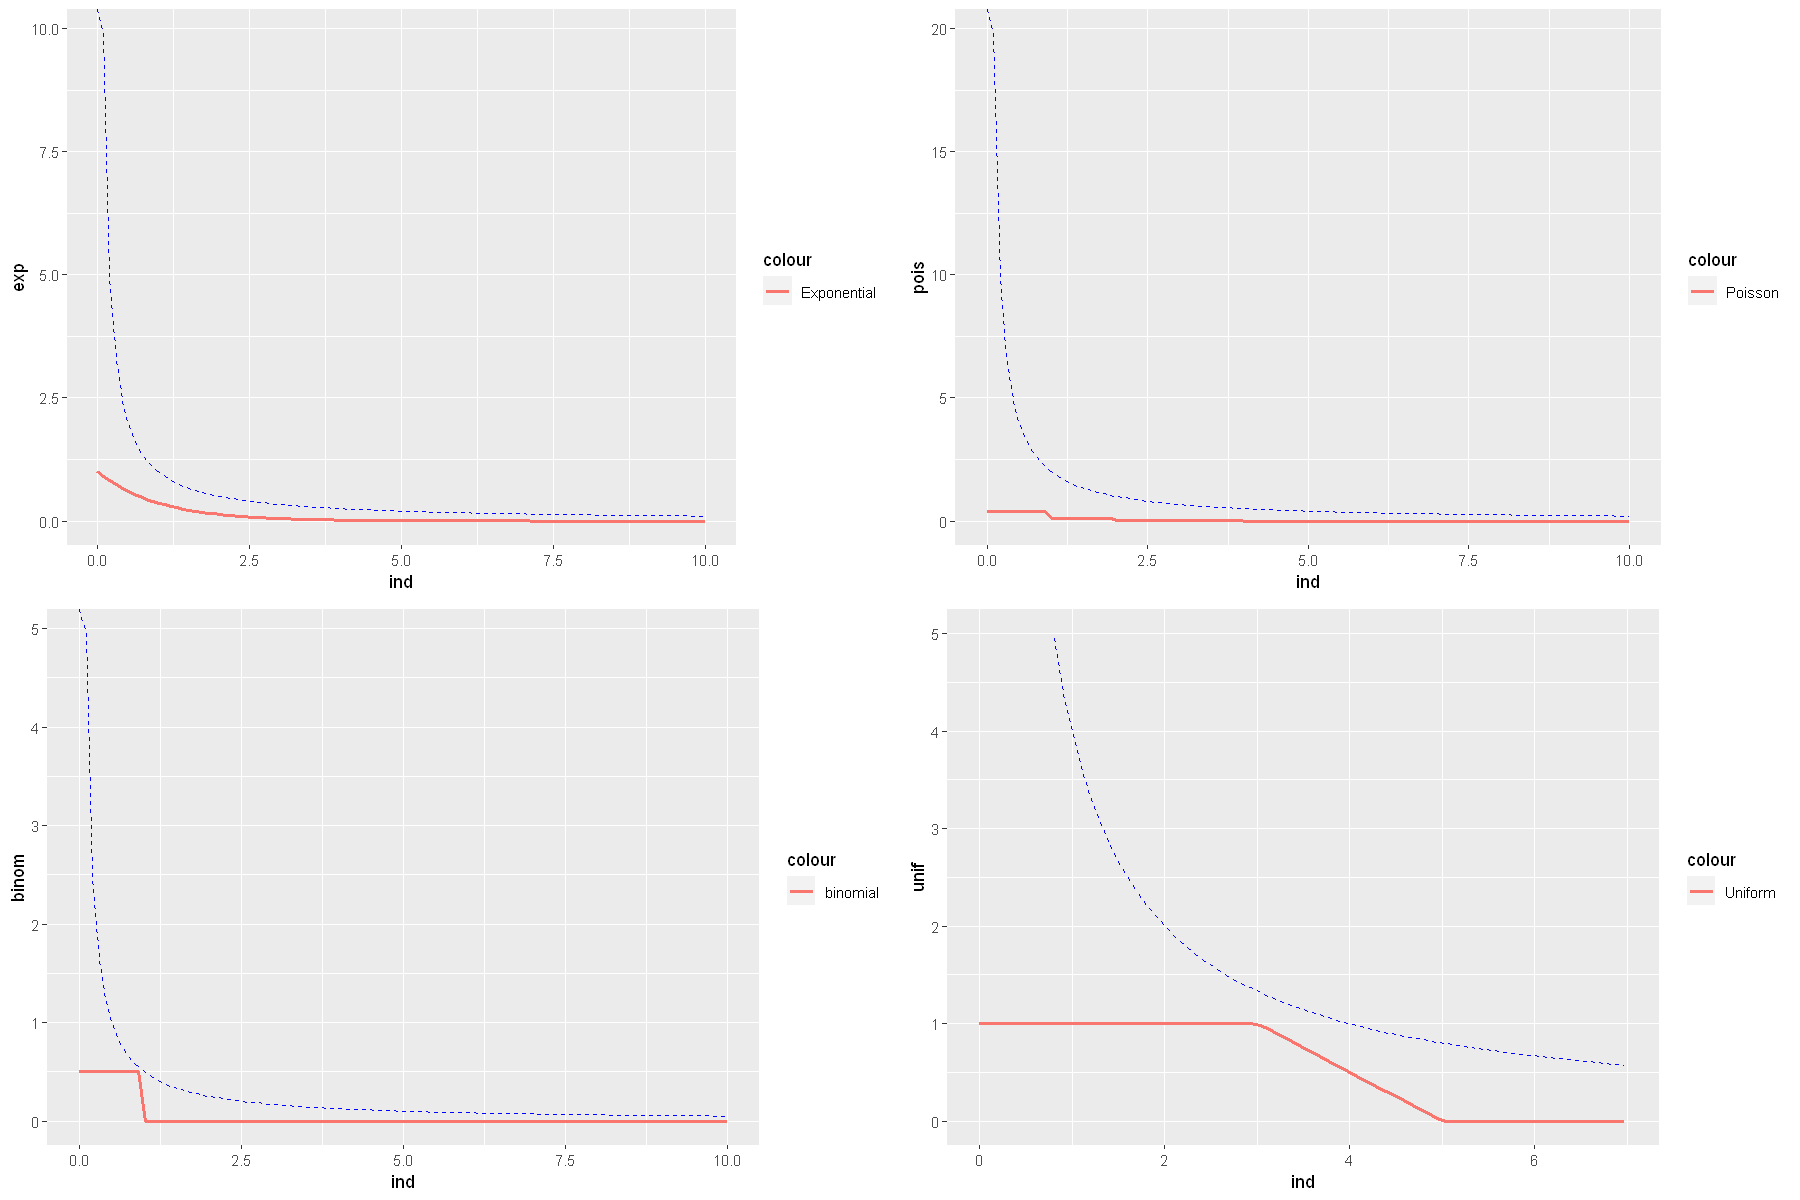

In [8]:
options(repr.plot.width=15, repr.plot.height=10)
grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2)
options(repr.plot.width=8, repr.plot.height=6)

## Exercise 3 - Chebyshev’s inequality

• Chebyshev’s inequality tell us that
$$P( \lvert X − \mu \rvert ≥ kσ) ≤ \frac{1}{k^2}$$
• which can also be written as
$$P( \lvert X − \mu \rvert < kσ) ≥ 1 - \frac{1}{k^2}$$
• use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the
following distributions:

a) a normal distribution, N(µ = 3, σ = 5)

b) an exponential distribution, Exp(λ = 1)

c) a uniform distribution U(1 - $\sqrt 2$, 1+$\sqrt 2$)

d) a Poisson, Pois(λ = 1/3), distribution function

In [9]:
cheb_fun <- function(f, par, q1, q2){
    do.call(f,c(list(q = q1),par)) + 1 - do.call(f, c(list(q = q2), par))            
}
a<- c()
ks <- c()
sq <- seq(0.5,5,0.1)
for (k in sq){
    fpar <- list( 
            list(pnorm, pexp, punif, ppois), 
            list(list(mean = 3, sd = 5), 
                 list(rate = 1), 
                 list(min = 1-sqrt(2), max = 1+sqrt(2)),  
                 list(lambda = 1.0/3)
                ),
            list(3-k*5, 1-k, 1-k*sqrt(2/3), 1/3-k*sqrt(1/3)),
            list(3+k*5, 1+k, 1+k*sqrt(2/3), 1/3+k*sqrt(1/3))
    )
    a <- c(a, pmap(fpar, cheb_fun))
    ks <- c(ks, rep(k,4))
}

res <- c()
for (j in a){
    res <- c(res, j)
}

norm <- c()
exp <- c()
unif <- c()
pois <- c()

for (j in seq(0,length(a)/4-1)){
    norm <- c(norm, a[[4*j+1]])
    exp  <- c(exp,  a[[4*j+2]])
    unif <- c(unif, a[[4*j+3]])
    pois <- c(pois, a[[4*j+4]])
}

Warning message:
"Removed 20 row(s) containing missing values (geom_path)."


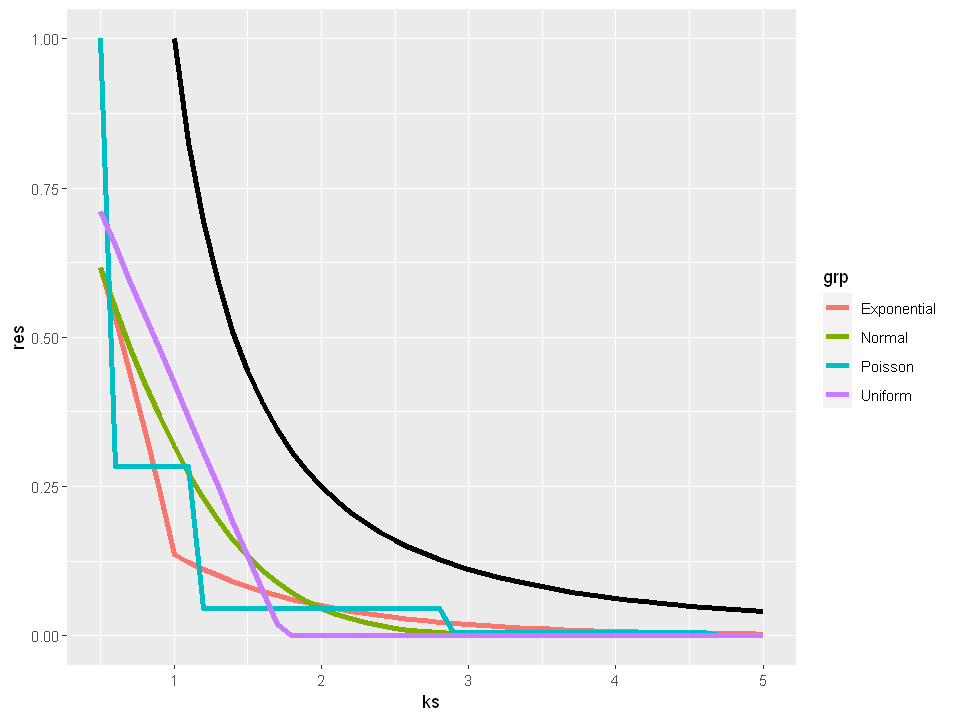

In [10]:
grp <- rep(c("Normal", "Exponential", "Uniform", "Poisson"), length(ks)/4)
k <- ks
cheb <- 1/ks^2
df_cheb <- data.frame(ks, cheb, grp, res)

ggplot()+
geom_line(data = df_cheb, aes(x = ks, y = res, group = grp, color = grp), size = 1.5) + 
geom_line(data = df_cheb, aes(x = ks, y = cheb), size = 1.5)+
ylim(0,1)

## Exercise 4 - Community Mobility Open Data

• Community Mobility Reports have been created with the aim to provide insights into what
has changed in response to policies aimed at combating COVID-19. Data can be found at
https://www.google.com/covid19/mobility/

• Download and analyze the following data sets:
- https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv

- https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

The data show how visitors to (or time spent in) categorized places change compared to
baseline days. A baseline day represents a normal value for that day of the week. The
baseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020.
To make the reports useful, categories have been used to group some of the places with
similar characteristics for purposes of social distancing guidance. The following categories
are available:

- retail and recreation, i.e. places like restaurants,cafes, shopping centers, theme parks,museums,
libraries, and movie theaters

- grocery and pharmacy, i.e. grocery markets, food warehouses, farmers markets, specialty
food shops, drug stores, and pharmacies

- parks, i.e. national parks, public beaches, marinas, dog parks, plazas,and public gardens

- transit stations i.e. all public transport hubs such as subway, bus, and train stations

- workplaces, i.e. places of work

- residential, i.e. people’s residence

• Select a couple of countries of your choice and analyze the trends in the previous
variables over time:

- produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to lubridate::week) and one month and quantify the impact of COVID-19 restrictions on mobility situations

In [11]:
load_csvfile <- function(fname, groupf = lubridate::week){
    gdata  = read_csv(fname, col_types = cols())
    gdata = mutate(gdata, date = groupf(date))
    gdata = gdata[is.na(gdata$sub_region_1) ,]
    return(gdata)
}

func_aggregate <- function(df){
    to_ret = df %>% group_by(country_region, date) %>% summarise (RR = mean(retail_and_recreation_percent_change_from_baseline), 
                                                                      phm = mean(grocery_and_pharmacy_percent_change_from_baseline), 
                                                                      park = mean(parks_percent_change_from_baseline), 
                                                                      station = mean(transit_stations_percent_change_from_baseline), 
                                                                      wplaces = mean(workplaces_percent_change_from_baseline),
                                                                      house = mean(residential_percent_change_from_baseline) )
    return(to_ret)
}

gdata  = load_csvfile("2020_US_Region_Mobility_Report.csv")
US_week_gdata = func_aggregate(gdata)

gdata  = load_csvfile("2020_US_Region_Mobility_Report.csv", lubridate::month)
US_month_gdata = func_aggregate(gdata)

gdata  = load_csvfile("2020_DE_Region_Mobility_Report.csv")
GE_week_gdata = func_aggregate(gdata)

gdata  = load_csvfile("2020_DE_Region_Mobility_Report.csv", lubridate::month)
GE_month_gdata = func_aggregate(gdata)

gdata  = load_csvfile("2020_IT_Region_Mobility_Report.csv")
IT_week_gdata = func_aggregate(gdata)

gdata  = load_csvfile("2020_IT_Region_Mobility_Report.csv", lubridate::month)
IT_month_gdata = func_aggregate(gdata)

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.



In [12]:
p1 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = RR , color = "Retail Italy")) +
         geom_line( data = US_week_gdata, aes ( x = date, y = RR , color = "Retail USA")) +
         geom_line( data = GE_week_gdata, aes ( x = date, y = RR , color = "Retail Germany")) 
p2 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = phm , color = "Grocery and Pharma Italy")) +
         geom_line( data = US_week_gdata, aes ( x = date, y = phm , color = "Grocery and Pharma USA")) +
         geom_line( data = GE_week_gdata, aes ( x = date, y = phm , color = "Grocery and Pharma Germany")) 
p3 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = park , color = "Parks Italy")) +
         geom_line( data = US_week_gdata, aes ( x = date, y = park , color = "Parks USA")) +
         geom_line( data = GE_week_gdata, aes ( x = date, y = park , color = "Parks Germany")) 
p4 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = station , color = "Stations Italy")) +
         geom_line( data = US_week_gdata, aes ( x = date, y = station , color = "Stations USA")) +
         geom_line( data = GE_week_gdata, aes ( x = date, y = station , color = "Stations Germany")) 
p5 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = house , color = "House Italy")) +
         geom_line( data = US_week_gdata, aes ( x = date, y = house , color = "House USA")) +
         geom_line( data = GE_week_gdata, aes ( x = date, y = house , color = "House Germany")) 
p6 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = wplaces , color = "Workplaces Italy")) +
         geom_line( data = US_week_gdata, aes ( x = date, y = wplaces , color = "Workplaces USA")) +
         geom_line( data = GE_week_gdata, aes ( x = date, y = wplaces , color = "Workplaces Germany")) 


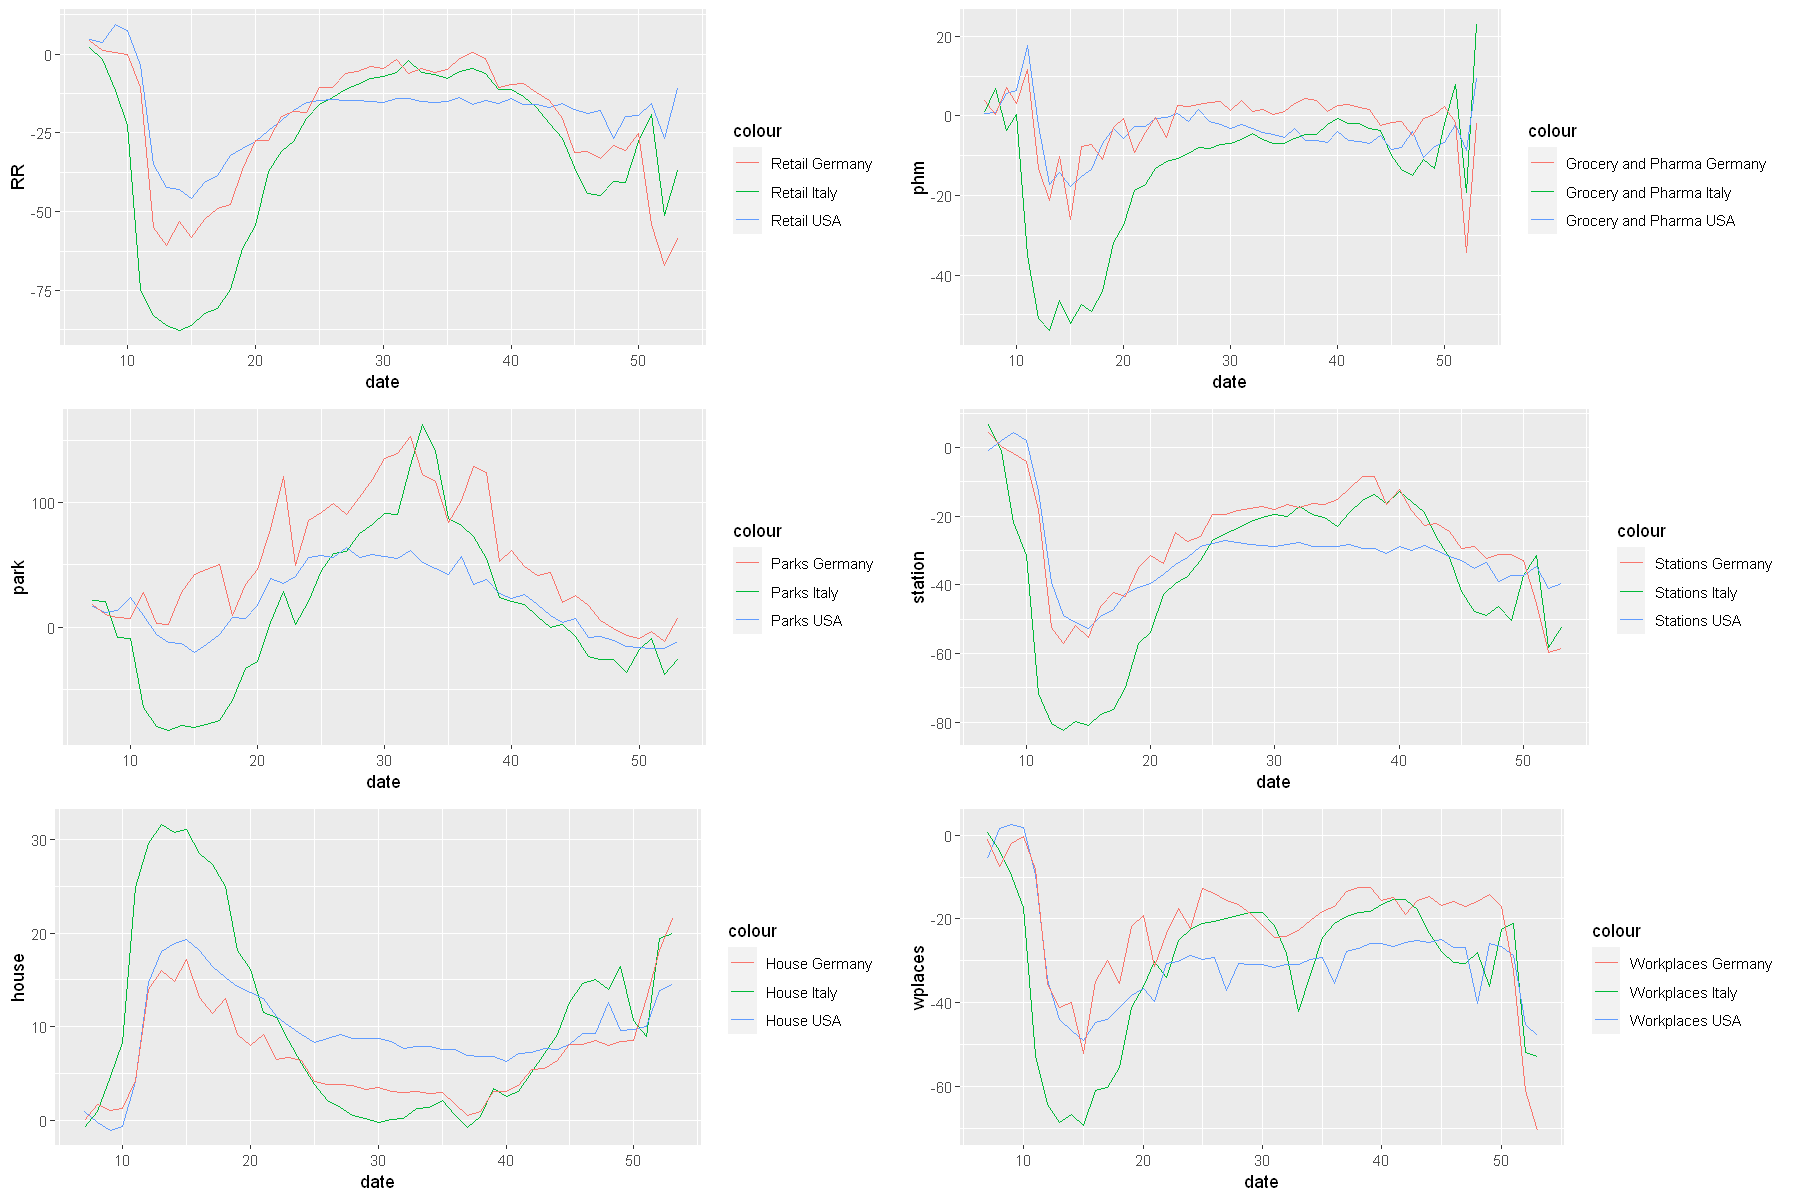

In [13]:
library(tidyverse)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)
options(repr.plot.width=15, repr.plot.height=10)

grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 2, nrow = 3)

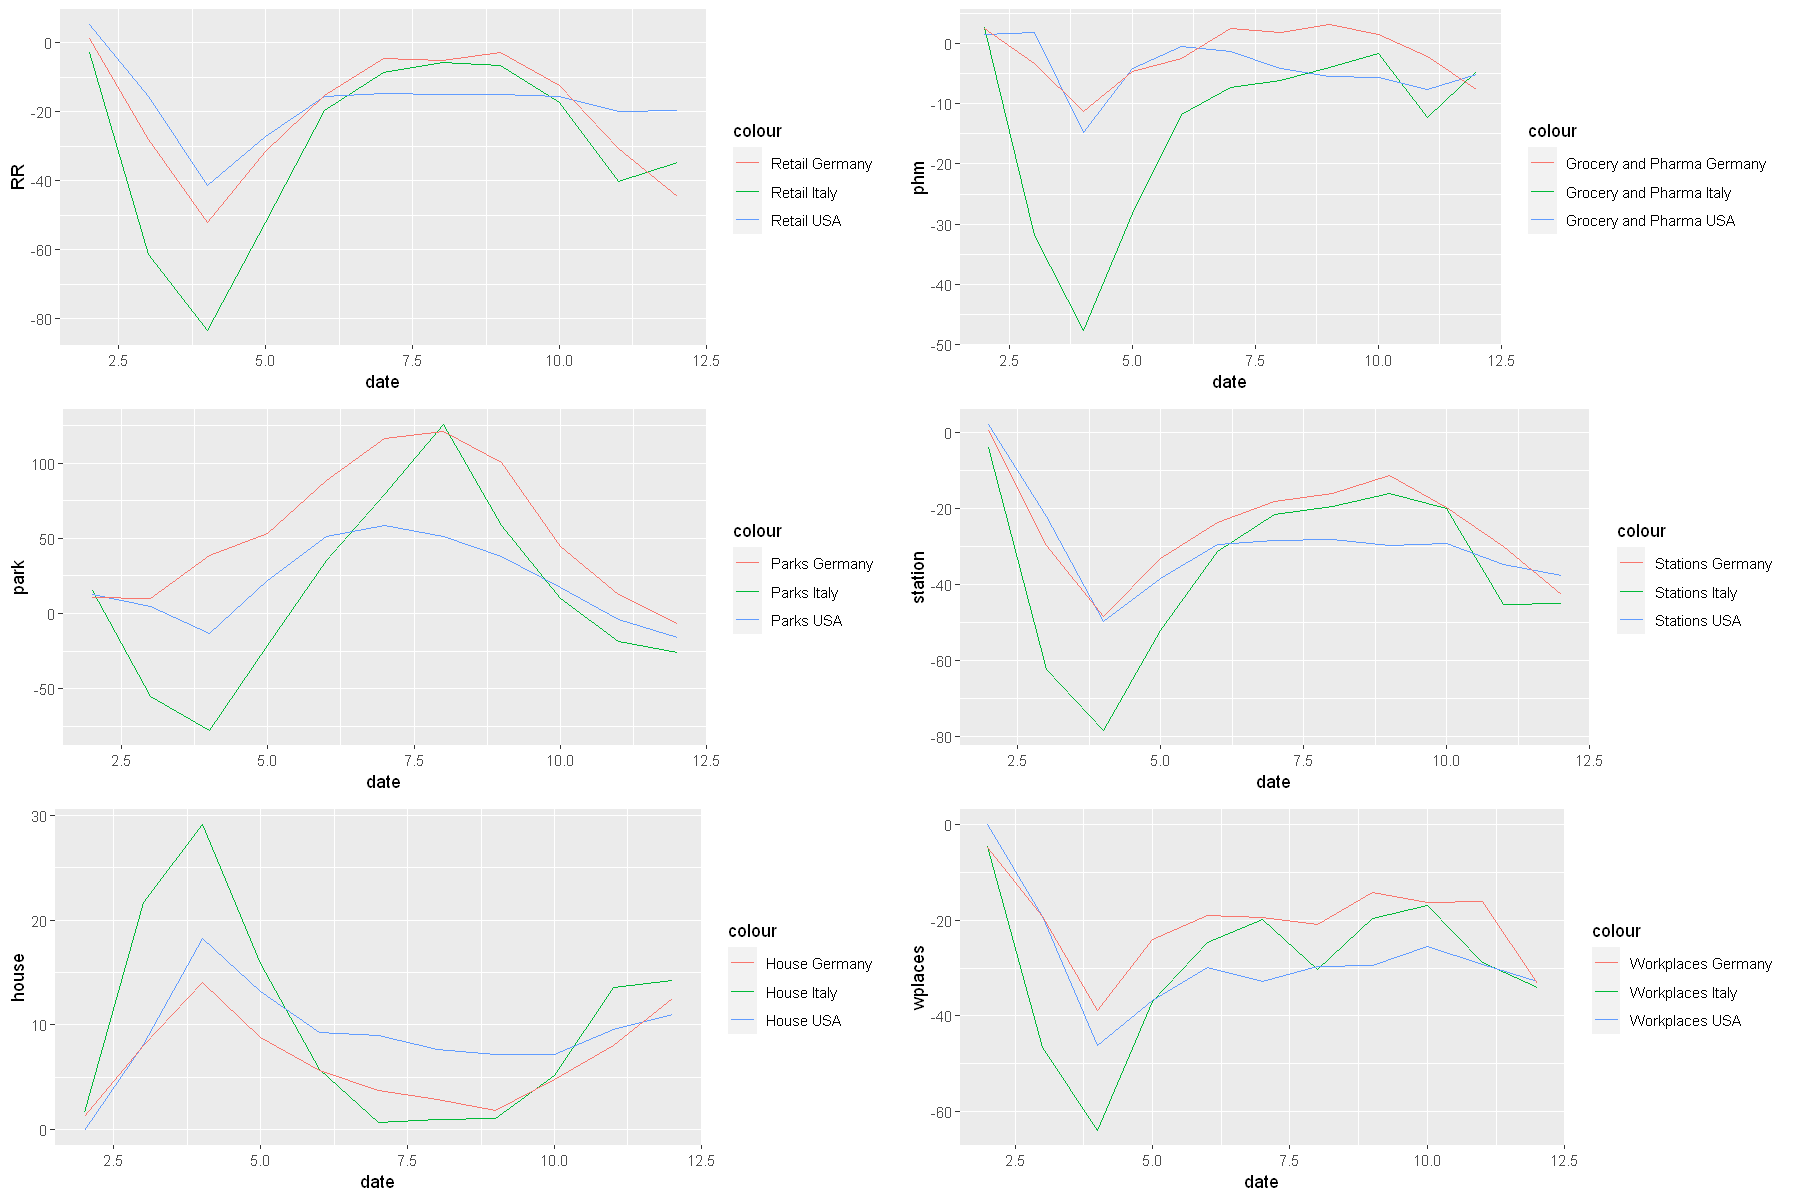

In [14]:
p1_m <- ggplot() + geom_line( data = IT_month_gdata, aes ( x = date, y = RR , color = "Retail Italy")) +
         geom_line( data = US_month_gdata, aes ( x = date, y = RR , color = "Retail USA")) +
         geom_line( data = GE_month_gdata, aes ( x = date, y = RR , color = "Retail Germany")) 
p2_m <- ggplot() + geom_line( data = IT_month_gdata, aes ( x = date, y = phm , color = "Grocery and Pharma Italy")) +
         geom_line( data = US_month_gdata, aes ( x = date, y = phm , color = "Grocery and Pharma USA")) +
         geom_line( data = GE_month_gdata, aes ( x = date, y = phm , color = "Grocery and Pharma Germany")) 
p3_m <- ggplot() + geom_line( data = IT_month_gdata, aes ( x = date, y = park , color = "Parks Italy")) +
         geom_line( data = US_month_gdata, aes ( x = date, y = park , color = "Parks USA")) +
         geom_line( data = GE_month_gdata, aes ( x = date, y = park , color = "Parks Germany")) 
p4_m <- ggplot() + geom_line( data = IT_month_gdata, aes ( x = date, y = station , color = "Stations Italy")) +
         geom_line( data = US_month_gdata, aes ( x = date, y = station , color = "Stations USA")) +
         geom_line( data = GE_month_gdata, aes ( x = date, y = station , color = "Stations Germany")) 
p5_m <- ggplot() + geom_line( data = IT_month_gdata, aes ( x = date, y = house , color = "House Italy")) +
         geom_line( data = US_month_gdata, aes ( x = date, y = house , color = "House USA")) +
         geom_line( data = GE_month_gdata, aes ( x = date, y = house , color = "House Germany")) 
p6_m <- ggplot() + geom_line( data = IT_month_gdata, aes ( x = date, y = wplaces , color = "Workplaces Italy")) +
         geom_line( data = US_month_gdata, aes ( x = date, y = wplaces , color = "Workplaces USA")) +
         geom_line( data = GE_month_gdata, aes ( x = date, y = wplaces , color = "Workplaces Germany")) 

options(repr.plot.width=15, repr.plot.height=10)

grid.arrange(p1_m,p2_m,p3_m,p4_m,p5_m,p6_m, ncol = 2, nrow = 3)

### My region - Lombardia

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.



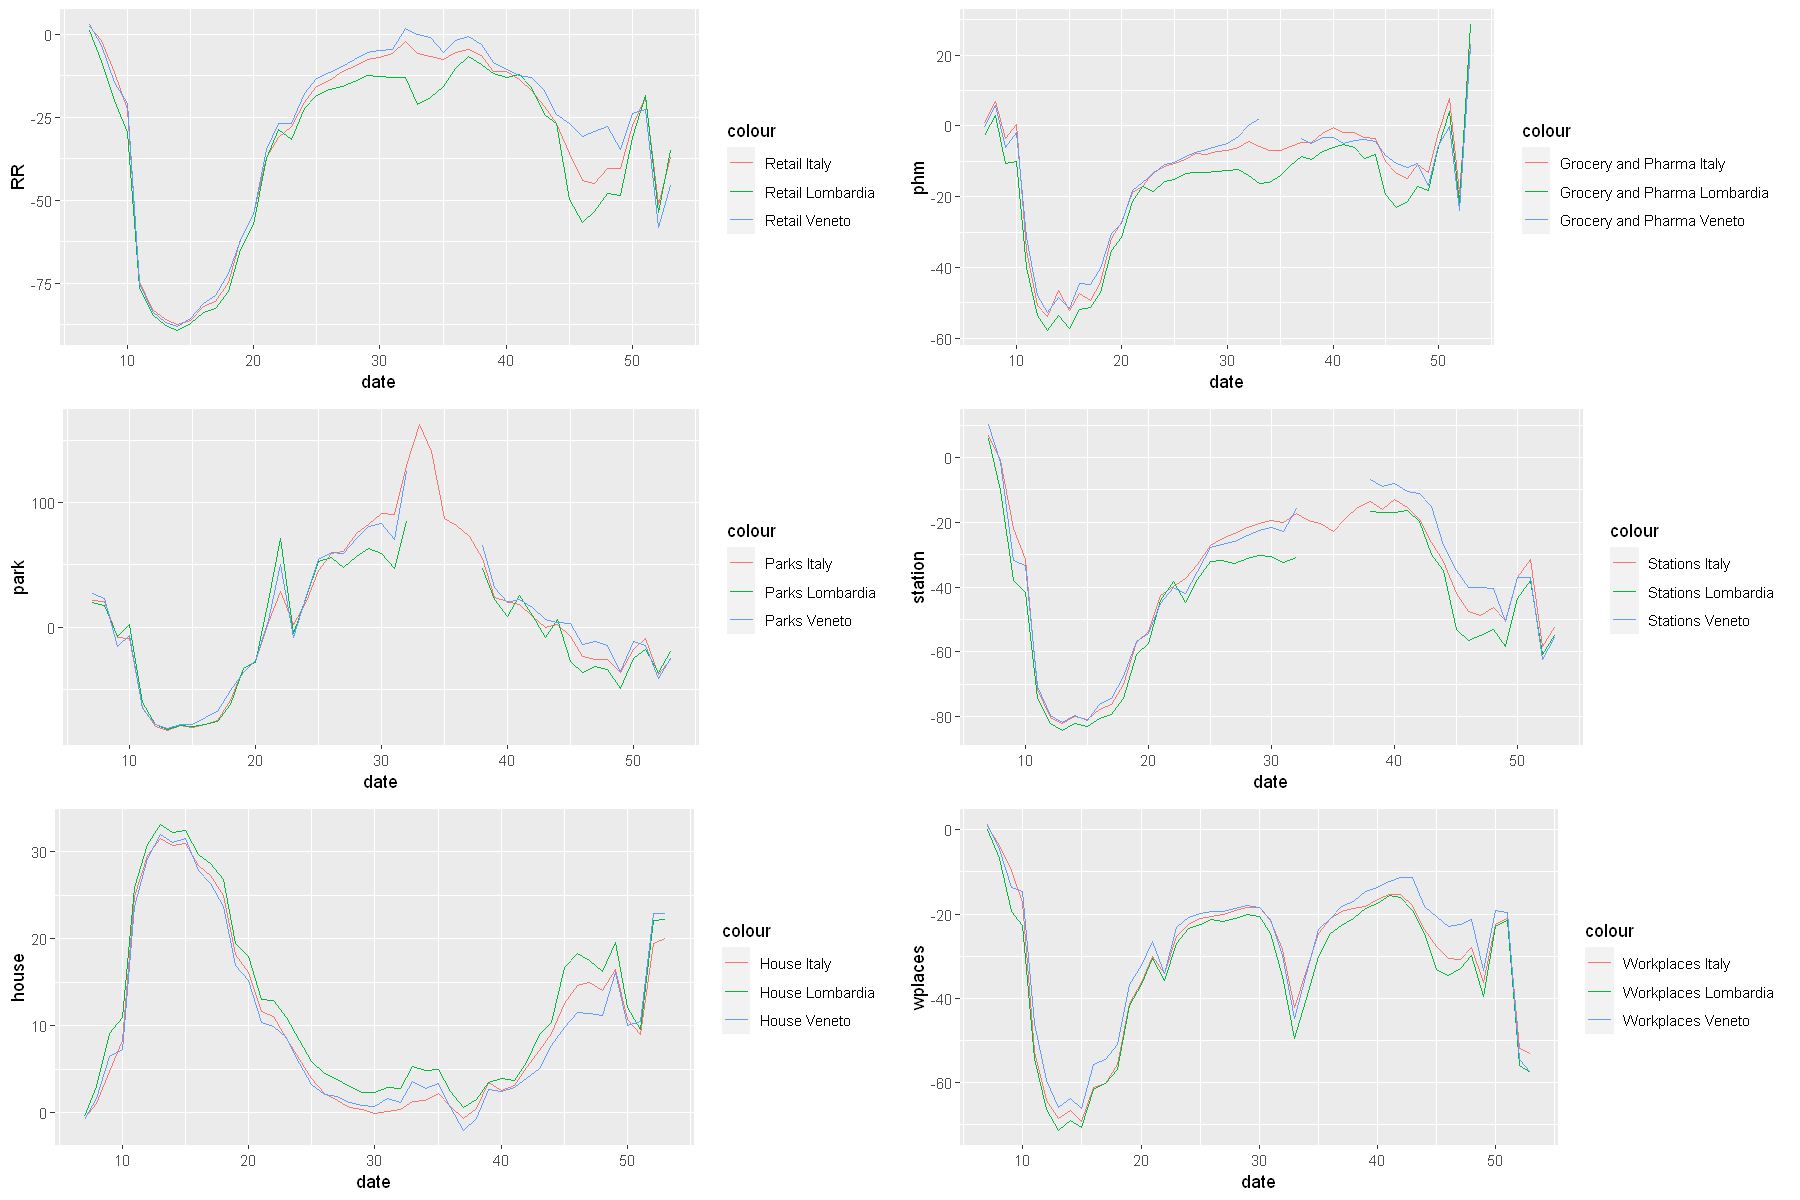

In [15]:
#subset(gdata, sub_region_1=="Abruzzo")

load_csvfile_region <- function(fname, reg_name, groupf = lubridate::week){
    gdata  = read_csv(fname, col_types = cols())
    gdata = subset(gdata, sub_region_1==reg_name)
    gdata = mutate(gdata, date = groupf(date))
}

gdata  = load_csvfile_region("2020_IT_Region_Mobility_Report.csv", "Lombardy")
LOMB_week_gdata = func_aggregate(gdata)

gdata  = load_csvfile_region("2020_IT_Region_Mobility_Report.csv", "Lombardy", lubridate::month)
LOMB_month_gdata = func_aggregate(gdata)

gdata  = load_csvfile_region("2020_IT_Region_Mobility_Report.csv", "Veneto")
VENE_week_gdata = func_aggregate(gdata)


gdata  = load_csvfile_region("2020_IT_Region_Mobility_Report.csv", "Veneto", lubridate::month)
VENE_month_gdata = func_aggregate(gdata)

p1 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = RR , color = "Retail Italy")) +
         geom_line( data = LOMB_week_gdata, aes ( x = date, y = RR , color = "Retail Lombardia")) +
         geom_line( data = VENE_week_gdata, aes ( x = date, y = RR , color = "Retail Veneto")) 
p2 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = phm , color = "Grocery and Pharma Italy")) +
         geom_line( data = LOMB_week_gdata, aes ( x = date, y = phm , color = "Grocery and Pharma Lombardia")) +
         geom_line( data = VENE_week_gdata, aes ( x = date, y = phm , color = "Grocery and Pharma Veneto")) 
p3 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = park , color = "Parks Italy")) +
         geom_line( data = LOMB_week_gdata, aes ( x = date, y = park , color = "Parks Lombardia")) +
         geom_line( data = VENE_week_gdata, aes ( x = date, y = park , color = "Parks Veneto")) 
p4 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = station , color = "Stations Italy")) +
         geom_line( data = LOMB_week_gdata, aes ( x = date, y = station , color = "Stations Lombardia")) +
         geom_line( data = VENE_week_gdata, aes ( x = date, y = station , color = "Stations Veneto")) 
p5 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = house , color = "House Italy")) +
         geom_line( data = LOMB_week_gdata, aes ( x = date, y = house , color = "House Lombardia")) +
         geom_line( data = VENE_week_gdata, aes ( x = date, y = house , color = "House Veneto")) 
p6 <- ggplot() + geom_line( data = IT_week_gdata, aes ( x = date, y = wplaces , color = "Workplaces Italy")) +
         geom_line( data = LOMB_week_gdata, aes ( x = date, y = wplaces , color = "Workplaces Lombardia")) +
         geom_line( data = VENE_week_gdata, aes ( x = date, y = wplaces , color = "Workplaces Veneto")) 

options(repr.plot.width=15, repr.plot.height=10)

grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 2, nrow = 3)

Apparently there are no good reasons that from this data explain why Lombardy has been one of the most hit regions in terms of daily COVID-19 cases. 

Deeper analysis are anyway needed, as for example it would be interesting to check whether the baselines are representing the same absolute values or one of them is shifted with respect to the other. 